# K-Means Clustering
### By Chase Whitman

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Set pandas option to view all columns
pd.set_option('display.max_columns', None)

In [3]:
# Read in file
df = pd.read_csv('..//Datasets//churn_clean.csv')

In [4]:
df.shape

(10000, 50)

In [5]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


## Data Preprocessing

In [6]:
print('Shape of dataframe:')
print('Before drop:', df.shape)

# Drop columns that contain unique values
unique_columns = ['CaseOrder', 'Customer_id', 'Interaction', 'UID']

# Multiple columns are used to decribe location. Timezone will be used as a regional reference.
# The additional location columns will be dropped.
location_columns = ['City', 'State','County', 'Zip', 'Lat', 'Lng', 'Job', 'TimeZone']

# Apply the drop
df.drop(columns=(unique_columns+location_columns), inplace=True)

print('After drop:', df.shape)

Shape of dataframe:
Before drop: (10000, 50)
After drop: (10000, 38)


In [7]:
# Columns that contain binary values (Y/N)
binary_columns = ['Churn', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                  'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

# Convert values to 1s/0s
for col in binary_columns:
    df[col] = df[col].map(dict(Yes=1, No=0))

# Examine results
df[binary_columns].head()

,Churn,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,0,0,1,1,1,0,1,1,0,0,0,1,1
1,1,1,0,1,1,1,1,0,0,0,1,1,1
2,0,1,1,0,1,1,0,0,0,0,0,1,1
3,0,1,0,0,1,0,1,0,0,0,1,0,1
4,1,0,1,0,0,0,0,0,0,1,1,0,0


In [8]:
# One hot encode columns with multiple unique values
dummy_columns = ['Area']
df = pd.get_dummies(df, columns=dummy_columns, drop_first=True)

In [9]:
# One hot encode Internet Service based on Fiber Optic and DSL values
df['InternetService_FiberOptic'] = np.where(df.InternetService == 'Fiber Optic', 1, 0)
df['InternetService_DSL'] = np.where(df.InternetService == 'DSL', 1, 0)

# Examine results
print(df[['InternetService', 'InternetService_DSL', 'InternetService_FiberOptic']].head(8))

# Drop original Internet Service column
df.drop(columns='InternetService', inplace=True)

  InternetService  InternetService_DSL  InternetService_FiberOptic
0     Fiber Optic                    0                           1
1     Fiber Optic                    0                           1
2             DSL                    1                           0
3             DSL                    1                           0
4     Fiber Optic                    0                           1
5            None                    0                           0
6             DSL                    1                           0
7             DSL                    1                           0


In [10]:
# One hot encode Gender based on Male and Female
df['Gender_Male'] = np.where(df.Gender == 'Male', 1, 0)
df['Gender_Female'] = np.where(df.Gender == 'Female', 1, 0)

# Examine results
print(df[['Gender', 'Gender_Male', 'Gender_Female']].head(10))

# Drop original Gender column
df.drop(columns='Gender', inplace=True)

      Gender  Gender_Male  Gender_Female
0       Male            1              0
1     Female            0              1
2     Female            0              1
3       Male            1              0
4       Male            1              0
5     Female            0              1
6       Male            1              0
7     Female            0              1
8  Nonbinary            0              0
9     Female            0              1


In [11]:
# Reduce Marital categories into two types: 
#   Married:1 
#   Not Married:0
df['Marital'] = np.where(df.Marital == 'Married',1,0)

In [12]:
# One hot encode Payment Method based on automatic payments or checks
df['PaymentMethod_Auto'] = np.where(np.logical_or(df.PaymentMethod == 'Credit Card (automatic)', 
                       df.PaymentMethod == 'Bank Transfer(automatic)'), 1, 0)
df['PaymentMethod_Check'] = np.where(np.logical_or(df.PaymentMethod == 'Mailed Check', 
                       df.PaymentMethod == 'Electronic Check'), 1, 0)

# Examine results
print(df[['PaymentMethod', 'PaymentMethod_Auto', 'PaymentMethod_Check']].head(8))

# Drop original Payment Method column
df.drop(columns='PaymentMethod', inplace=True)

              PaymentMethod  PaymentMethod_Auto  PaymentMethod_Check
0   Credit Card (automatic)                   1                    0
1  Bank Transfer(automatic)                   1                    0
2   Credit Card (automatic)                   1                    0
3              Mailed Check                   0                    1
4              Mailed Check                   0                    1
5          Electronic Check                   0                    1
6          Electronic Check                   0                    1
7              Mailed Check                   0                    1


In [13]:
# Convert Contract type into numerical values based on the year value
df['Contract'] = df['Contract'].replace({'Month-to-month':0, 'One year':1, 'Two Year':2})

In [14]:
# Examine Results
df.head()

,Population,Children,Age,Income,Marital,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Area_Suburban,Area_Urban,InternetService_FiberOptic,InternetService_DSL,Gender_Male,Gender_Female,PaymentMethod_Auto,PaymentMethod_Check
0,38,0,68,28561.99,0,0,7.978323,10,0,1,0,1,1,1,1,0,1,1,0,0,0,1,1,6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4,0,1,1,0,1,0,1,0
1,10446,1,27,21704.77,1,1,11.699080,12,0,1,1,0,0,1,1,1,1,0,0,0,1,1,1,1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4,0,1,1,0,0,1,1,0
2,3735,4,50,9609.57,0,0,10.752800,9,0,1,1,2,1,0,1,1,0,0,0,0,0,1,1,15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3,0,1,0,1,0,1,1,0
3,13863,1,48,18925.23,1,0,14.913540,15,2,0,1,2,0,0,1,0,1,0,0,0,1,0,1,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3,1,0,0,1,1,0,0,1
4,11352,0,83,40074.19,0,1,8.147417,16,2,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5,1,0,1,0,1,0,0,1


In [15]:
# # Export cleaned dataset to csv
# df.to_csv('./D212_Task1_clean.csv')

### Split and Standardize Data

In [16]:
X = df.drop('Churn', 1)
y = np.array(df['Churn'])

In [17]:
# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                            test_size=0.3, 
                                                            random_state=42)
print('Training data: X:{}, y:{}'.format(X_train.shape, y_train.shape))
print('Test data: X:{}, y:{}'.format(X_test.shape, y_test.shape))

Training data: X:(7000, 41), y:(7000,)
Test data: X:(3000, 41), y:(3000,)


In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## K-Means Clustering

In [19]:
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm='auto')
kmeans.fit(X_train_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
# Training Score
pred_train = kmeans.predict(X_train_scaled)
print('The model clustered the training data with an accuracy of:')
print(accuracy_score(y_train, pred_train))

The model clustered the training data with an accuracy of:
0.5027142857142857


In [21]:
# Testing Score
pred_test = kmeans.predict(X_test_scaled)
print('The model clustered the testing data with an accuracy of:')
print(accuracy_score(y_test, pred_test))

The model clustered the testing data with an accuracy of:
0.519


## K-Means with Dimensionality Reduction

In [22]:
# Dimensionality Reduction
pca = PCA(n_components=2, random_state=42)

# Fit and transform train and test data
pca_X_train = pca.fit_transform(X_train_scaled)
pca_X_test = pca.transform(X_test_scaled)

In [23]:
# K-Means
kmeans_pca = KMeans(n_clusters=2, max_iter=600, algorithm='auto', random_state=42)
kmeans_pca.fit(pca_X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [24]:
# Training Score
pred_train_pca = kmeans_pca.predict(pca_X_train)
print('The model clustered the training data with an accuracy of:')
print(accuracy_score(y_train, pred_train_pca))

The model clustered the training data with an accuracy of:
0.5054285714285714


In [25]:
# Testing Score
pred_test_pca = kmeans_pca.predict(pca_X_test)
print('The model clustered the testing data with an accuracy of:')
print(accuracy_score(y_test, pred_test_pca))

The model clustered the testing data with an accuracy of:
0.5226666666666666


In [26]:
pca_df = pd.DataFrame(pca_X_train, columns=['PC1', 'PC2'])
pca_df['KM'] = pred_train_pca
pca_df.head()

,PC1,PC2,KM
0,0.370250,1.952586,1
1,-1.896326,-0.993357,0
2,1.737927,-0.999573,1
3,-2.220860,2.062674,0
4,-0.520665,0.181751,0


C:\Users\chase\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


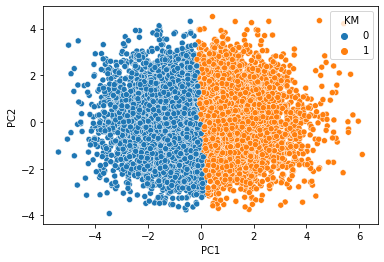

In [27]:
sns.scatterplot('PC1', 'PC2', data=pca_df, hue='KM')